DATA SCIENCE FOUNDATIONS II
# Linear Regression at Codecademy

For this project, you’ll get to work as a data analyst alongside the curriculum team at Codecademy to help us improve the learner experience. While this data is simulated, it is similar to real data that we might want to investigate as Codecademy team members!

Note that a **solution.py** file is loaded for you in the workspace, which contains solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or want to check your answers when you’re done!

Finally, a quick note about plotting: in order to prevent plots from getting layered on top of each other, you’ll need to show then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Note: clearing the plot will not erase it — it will just create a new plot for the next graphic.

Let’s get started!

In [90]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


## Inspect the data

**1.**
A dataset has been loaded for you in **script.py** and saved as a dataframe named `codecademy`. We’re imagining that this data was collected as part of an experiment to understand factors that contribute to learner performance on a quiz. The data contains three columns:

- `score`: student score on a quiz
- `completed`: the number of other content items on Codecademy that the learner has completed prior to this quiz
- `lesson`: indicates which lesson the learner took directly before the quiz (`'Lesson A'` or `'Lesson B'`)

Take a look at this dataset by printing the first five rows.

<details><summary><i>Hint</i></summary>

Use the `.head()` method on `codecademy` along with `print()` to print the first five rows.

Note that a **solution.py** file is loaded for you in the workspace, which contains the solution code for this project.

In [91]:
# Read in the data
codecademy = pd.read_csv('codecademy.csv')

# Print the first five rows
print(codecademy.head())

   score  completed    lesson
0   82.7       35.0  Lesson A
1   65.2       31.0  Lesson A
2   55.3       33.0  Lesson A
3   28.8       25.0  Lesson B
4   31.2       18.0  Lesson B


## Model the relationship between quiz score and number of completed content items

**2.**
Plot a scatter plot of `score` (y-axis) against `completed` (x-axis) to see the relationship between quiz score and number of completed content items. Make sure to show, then clear the plot.

Is there a relationship between these two variables, and does it appear to be linear?

<details><summary><i>Hint</i></summary>

Use `plt.scatter()` to create a scatter plot. The first argument is the x-variable (`codecademy.completed`) and the second argument is the y-variable (`codecademy.score`). After calling `plt.scatter()`, use the following two lines of code to show, then clear the plot:

>```py
>plt.show() # Show the plot
>plt.clf() # Clear the plot
>```

Note that a **solution.py** file is loaded for you in the workspace, which contains the solution code for this project.

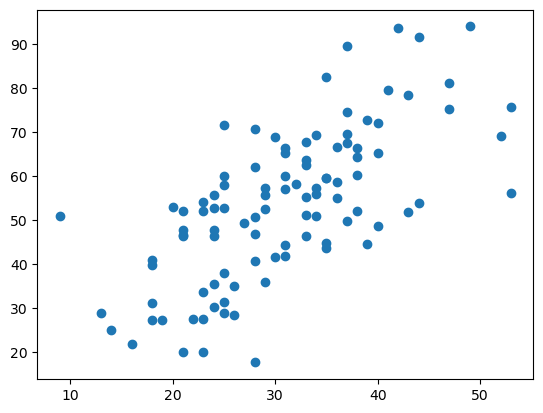

<Figure size 640x480 with 0 Axes>

In [92]:
# Create a scatter plot of score vs completed
plt.scatter(codecademy.completed, codecademy.score)

# Show then clear plot
plt.show()
plt.clf()

**3.**
Create and fit a linear regression model that predicts `score` using `completed` as the predictor. Print out the regression coefficients.

<details><summary><i>Hint</i></summary>

Below is the code to fit a model to predict `weight` using `height` as a predictor, where `weight` and `height` are columns of a dataframe named body_measurements.

Modify this code to instead predict `score` using `completed` as the predictor, where `score` and `completed` are columns of a dataframe named `codecademy`.

>```py
>model = sm.OLS.from_formula('weight ~ height', data = body_measurements)
>results = model.fit()
>print(results.params)
>```

In [93]:
model = sm.OLS.from_formula('score ~ completed', codecademy).fit()

print(model.params)

Intercept    13.214113
completed     1.306826
dtype: float64


**4.**
Write a one-sentence (each) interpretation of the slope and intercept that you printed out in the previous step. Make sure to comment out the interpretation so your code still runs.

<details><summary><i>Hint</i></summary>

The intercept is the expected value of the outcome variable when the predictor variable is equal to zero. The slope is the expected difference in the outcome variable for a one unit increase in the predictor variable.

In [94]:
# Intercept interpretation:
print('Intercept is at y=13.214 when x=0. In other words a student will score 13.214 on a quiz when the learner haven\'t completed any other codecademy content items.')
# A learner who has previously completed 0 content items is expected to earn a quiz score of 13.2 points.

# Slope interpretation:
print('Student will score 13.214 more for each content item completed in codecademy')
# Students who have completed one additional prior content item are expected to score 1.3 points higher on the quiz.

Intercept is at y=13.214 when x=0. In other words a student will score 13.214 on a quiz when the learner haven't completed any other codecademy content items.
Student will score 13.214 more for each content item completed in codecademy


**5.**
Plot the same scatter plot that you made earlier (with `score` on the y-axis and `completed` on the x-axis), but this time add the regression line on top of the plot. Make sure to show, then clear the plot.

Do you think this line fits the data well?

<details><summary><i>Hint</i></summary>

There are a few different ways to accomplish this, but one option is to use `plt.plot()` to create the line, using the `completed` column from the original data as the x-coordinates (first argument) and the predicted values of `score` (based on the model) as the y-coordinates (second argument). The code should look something like this (you’ll need to fill in the blanks):

>```py
># Create the scatter plot:
>plt.scatter(codecademy.completed, codecademy.score)
>
># Add the line:
>plt.plot(___, model_results.predict(___))
>
># Show then clear the plot
>plt.show() # Show the plot
>plt.clf() # Clear the plot
>```

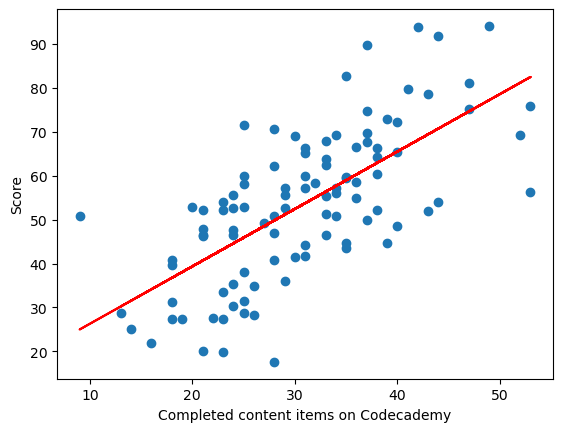

<Figure size 640x480 with 0 Axes>

In [132]:
# Plot the scatter plot with the line on top
plt.scatter(codecademy.completed, codecademy.score)
predicted_score = model.params.iloc[0] + model.params.iloc[1]*codecademy.completed
plt.plot(codecademy.completed, predicted_score, c='r')    # predict_score: y=mx+b

# Show then clear plot
plt.xlabel('Completed content items on Codecademy')
plt.ylabel('Score')
plt.title('')
plt.show()
plt.clf()

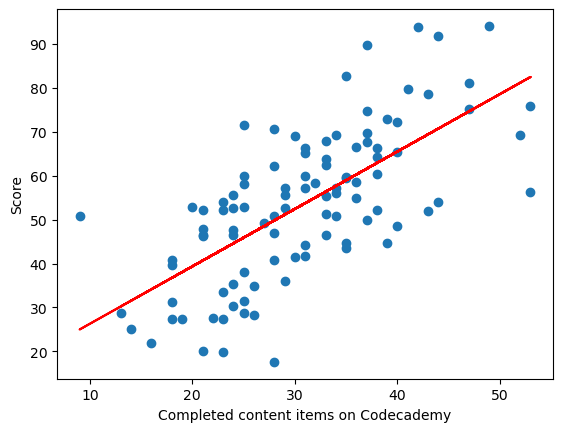

<Figure size 640x480 with 0 Axes>

In [133]:
# Plot the scatter plot with the line on top
plt.scatter(codecademy.completed, codecademy.score)
predicted_score = model.params.iloc[0] + model.params.iloc[1]*codecademy.completed
plt.plot(codecademy.completed, model.predict(codecademy), c='r')    # differs with previous code: model.predict(data)

# Show then clear plot
plt.xlabel('Completed content items on Codecademy')
plt.ylabel('Score')
plt.title('')
plt.show()
plt.clf()

**6.**
Use your model to calculate the predicted quiz score for a learner who has previously completed 20 other content items.

<details><summary><i>Hint</i></summary>

There are a few ways to do this:

- One option is to use the `.predict()` method on your fitted model and pass in a new dataset with `completed = 20`. You can create this new dataset as follows:

>```py
>newdata = {'completed':[20]}
>```

- Another option is to use your equation of a line along with the intercept and slope you calculated when you fit the model. The formula looks something like: `slope * 20 + intercept`.

The answer should be about 39.3.

In [97]:
# Predict score for learner who has completed 20 prior lessons
newdata = {'completed': [20]}
score_20 = model.predict(newdata)
print('Expected Score on 20 items completed:', score_20[0])

Expected Score on 20 items completed: 39.35062487732294


**7.**
Calculate the fitted values for your model and save them as `fitted_values`.

<details><summary><i>Hint</i></summary>

Use the `.predict()` method on your fitted model and pass in the data that was used to fit the model (`codecademy`).

Note that a **solution.py** file is loaded for you in the workspace, which contains the solution code for this project.

In [98]:
# Calculate fitted values
fitted_vals = model.predict(codecademy)
print(fitted_vals.head())
# print(codecademy.score.head())


0    58.953009
1    53.725706
2    56.339358
3    45.884753
4    36.736974
dtype: float64


**8.**
Calculate the residuals for the model and save the result as `residuals`.

<details><summary><i>Hint</i></summary>

Subtract the `fitted_values` that you calculated in the previous from the true student quiz scores (`codecademy.score`).

In [99]:
# Calculate residuals
residuals = codecademy.score - fitted_vals
print(residuals.head())


0    23.746991
1    11.474294
2    -1.039358
3   -17.084753
4    -5.536974
dtype: float64


**9.**
Check the normality assumption for linear regression by plotting a histogram of the residuals. Make sure to show and clear the plot.

Do the residuals appear to be approximately normally distributed?

<details><summary><i>Hint</i></summary>

Use `plt.hist()` to create a histogram and pass in the `residuals` that you calculated in the previous step. Then, make sure to show and clear the plot using `plt.show()` and `plt.clf()`.

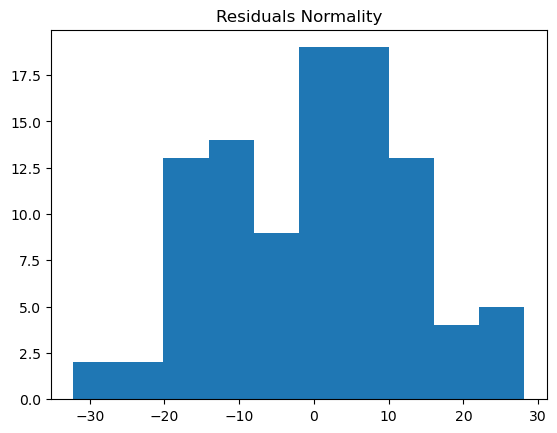

<Figure size 640x480 with 0 Axes>

In [130]:
# Check normality assumption
plt.hist(residuals)

# Show then clear the plot
plt.title('Residuals Normality')
plt.show(); plt.clf()

**10.**
Check the homoscedasticity assumption for linear regression by plotting the residuals (y-axis) against the fitted values (x-axis).

Do you see any patterns or is the homoscedasticity assumption met?

<details><summary><i>Hint</i></summary>

Use `plt.scatter()` to create the scatter plot and pass in `fitted_values` as the first argument (x-variable) and `residuals` as the second argument (y-variable). Then, make sure to show and clear the plot using `plt.show()` and `plt.clf()`.

There is no pattern in this plot; the homoscedasticity assumption is met.

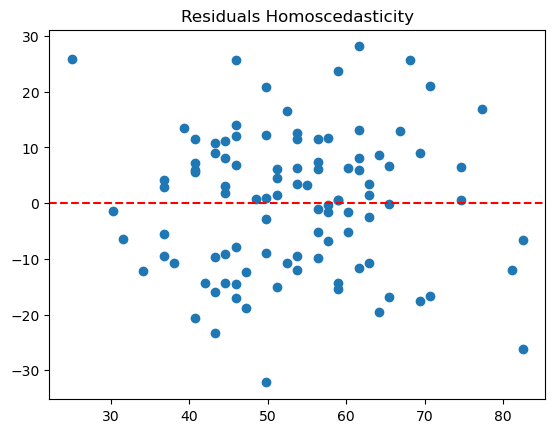

<Figure size 640x480 with 0 Axes>

In [131]:
# Check homoscedasticity assumption
plt.scatter(fitted_vals, residuals)
plt.axhline(0, c='r', ls='--')

# Show then clear the plot
plt.title('Residuals Homoscedasticity')
plt.show(); plt.clf()

## Do learners who take lesson A or B perform better on the quiz?
**11.**
Let’s now turn our attention to the `lessons` column to see if learners who took different lessons scored differently on the quiz.

Use `sns.boxplot` to create a boxplot of `score` (y-variable) for each `lesson` (x-variable) to see the relationship between quiz score and which lesson the learner completed immediately before taking the quiz. Make sure to show, then clear the plot.

Does one lesson appear to do a better job than the other of preparing students for this quiz? If so, which one?

<details><summary><i>Hint</i></summary>

Use `sns.boxplot()` to create a boxplot. The code is provided below (with a few blanks to fill in):

>```py
>sns.boxplot(x = 'lesson', y = '___', data = ___)
>plt.show() # Show the plot
>plt.clf() # Clear the plot
>```

Note that a **solution.py** file is loaded for you in the workspace, which contains the solution code for this project.


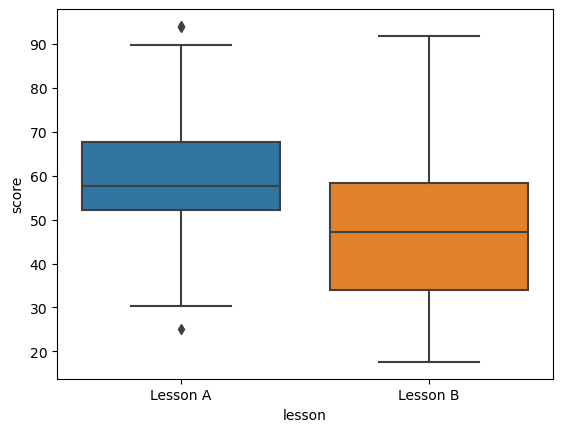

<Figure size 640x480 with 0 Axes>

In [102]:
# Create a boxplot of score vs lesson
sns.boxplot(x=codecademy.lesson, y=codecademy.score)
# sns.boxplot(x='lesson', y='score', data=codecademy)

# Show then clear plot
plt.show(); plt.clf()

**12.**
Create and fit a linear regression model that predicts `score` using `lesson` as the predictor. Print out the regression coefficients.

<details><summary><i>Hint</i></summary>

Below is the code to fit a model to predict `weight` using `height` as a predictor, where `weight` and `height` are columns of a dataframe named `body_measurements`.

Modify this code to instead predict `score` using `lesson` as the predictor, where `score` and `lesson` are columns of a dataframe named `codecademy`.

>```py
>model = sm.OLS.from_formula('weight ~ height', data = body_measurements)
>results = model.fit()
>print(results.params)
>```


In [103]:
# Fit a linear regression to predict score based on which lesson they took
model_2 = sm.OLS.from_formula('score ~ lesson', codecademy).fit()
print(model_2.params)


Intercept             59.220
lesson[T.Lesson B]   -11.642
dtype: float64


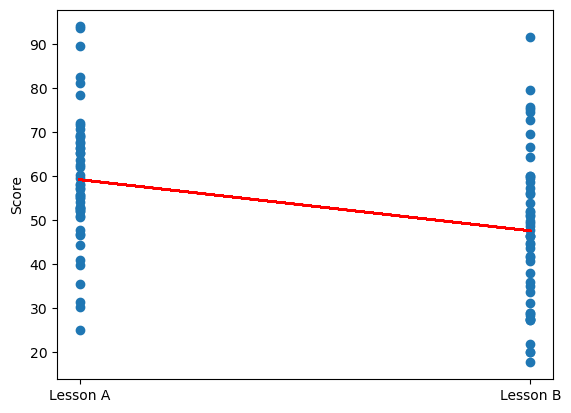

<Figure size 640x480 with 0 Axes>

In [129]:
plt.scatter(codecademy.lesson, codecademy.score)
plt.plot(codecademy.lesson, model_2.predict(codecademy), c='r')
plt.ylabel('Score')
plt.show(); plt.clf()


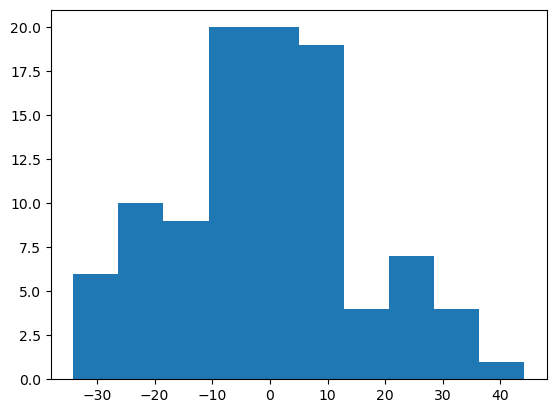

<Figure size 640x480 with 0 Axes>

In [121]:
# Check normality assumption
fitted_vals_2 = model_2.predict(codecademy)
residuals_2 = codecademy.score - fitted_vals_2
plt.hist(residuals_2)
plt.show()
plt.clf()


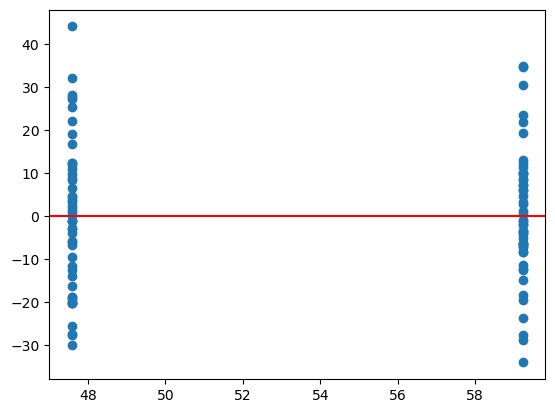

<Figure size 640x480 with 0 Axes>

In [124]:
# Check homoscedasticity assumption
plt.scatter(fitted_vals_2, residuals_2)
plt.axhline(0, c='r')
plt.show()
plt.clf()

**13.**
- Calculate and print out the mean quiz scores for learners who took lesson A and lesson B.
- Calculate and print out the mean difference.

Can you see how these numbers relate to the intercept and slope that you printed out in the linear regression output?

<details><summary><i>Hint</i></summary>

To calculate and print the mean quiz score for learners who took lesson A, you can use the following code:

>```py
>print(np.mean(codecademy.score[codecademy.lesson == 'Lesson A']))
>```

You should find that the intercept from the regression output is equal to the mean score for learners who took lesson A, and the slope is equal to the mean difference.


In [128]:
# Calculate and print the group means and mean difference (for comparison)
mean_score_group = codecademy.groupby(['lesson']).mean().score
print(mean_score_group)
print('\nMean differences on Scores:', np.round((mean_score_group.iloc[0] - mean_score_group.iloc[1]), 2) )

lesson
Lesson A    59.220
Lesson B    47.578
Name: score, dtype: float64

Mean differences on Scores: 11.64


## Next steps

**14.**
Congratulations! You’ve used a simple linear model to understand how quiz scores are related to other learner actions. In this project, we’ve focused on modeling the relationship between quiz score and one other variable at a time (first we looked at `completed`, then we looked at `lesson` separately).

The next step in linear regression is to model quiz scores as a function of multiple other variables at once! To get a preview of what this might look like visually, let’s try using `seaborn`'s `lmplot()` function to plot a scatter plot of `score` vs. `completed`, colored by `lesson`. For context, the `lm` in `lmplot()` stands for “linear model”. This function will automatically plot a linear regression model on top of the scatter plot. The code to implement this looks like:

>```py
>sns.lmplot(x = 'completed', y = 'score', hue = 'lesson', data = codecademy)
>plt.show()
>```

Note that when we include a third variable in our plot using the `hue` parameter (which controls the color of each point in the scatter plot), something interesting happens! All of a sudden, we end up with multiple regression lines. To find out how to fit and interpret this model, you’ll have to continue learning about linear regression!

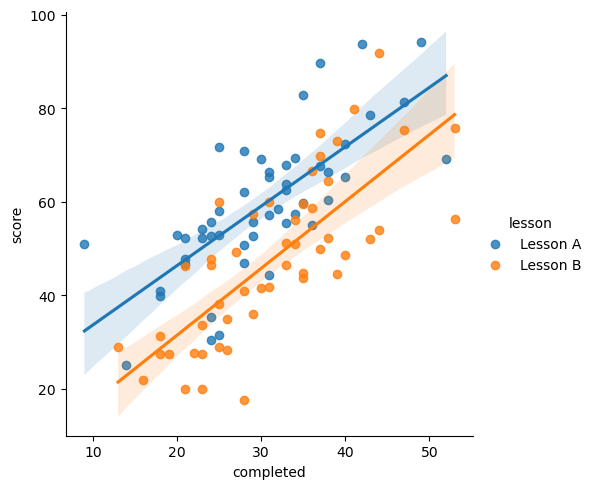

<Figure size 640x480 with 0 Axes>

In [134]:
sns.lmplot(x = 'completed', y = 'score', hue = 'lesson', data = codecademy)
plt.show()
plt.clf()